# <font color=red>DATA VISULIZATION:</font>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#data reading
data=pd.read_csv("titanic.csv")

#printing the size of dataset
print("The size of entire dataset: ")
print(data.shape)

#information on the dataframe
data.info()

The size of entire dataset: 
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
#Display first 10 rows of the data.
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#Display first 5 rows of the data having the given columns only.
# ‘PassengerID’, ‘Name’, ‘Age’, ‘Sex’ 

#axis =1 says that it is vertical axis (coloumns)
#axis=0 says that it is horizontal axis (rows)
data1=data.drop(['Survived','Pclass','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1)
data1.head(5)

,PassengerId,Name,Sex,Age
0,1,"Braund, Mr. Owen Harris",male,22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,"Allen, Mr. William Henry",male,35.0


# <font color=red> DATA ANALYSIS:</font>

In [4]:
# Plot the count of survived passengers
#0-dead 1-survived

data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

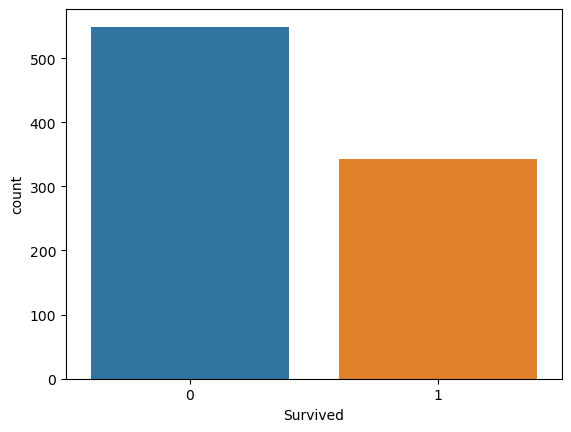

In [5]:
#plotting the data of Survived people

sns.countplot(x=data["Survived"])

Text(0.5, 1.0, 'AGE HISTOGRAM')

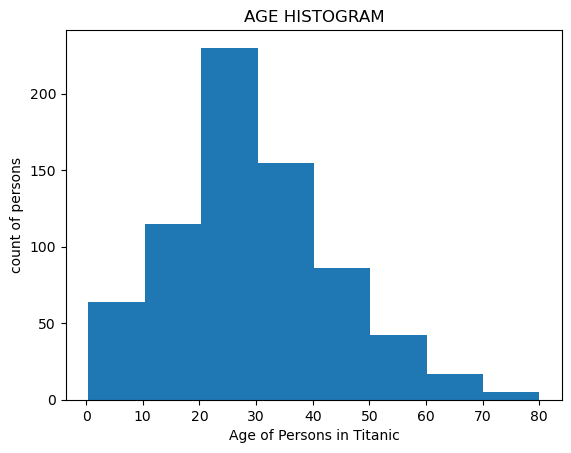

In [6]:
# Plot histogram of ‘Age’ column
# bins

plt.hist(data['Age'], bins=8)
 
plt.xlabel('Age of Persons in Titanic')
plt.ylabel('count of persons')
plt.title('AGE HISTOGRAM')


# <font color=red>DATAWRANGLING & FEATURE SELECTION:</font>

In [7]:
data2=data;

# Drop the following unnecessary columns. ‘PassengerID’,’Name’, ‘Ticket’, ‘Cabin’, ‘Embarked’
data2.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],inplace=True,axis=1)
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
# no of NaN  entries in ‘Age’ column
ans= data2['Age'].isna().sum()
print("The No of NaN entries in Age Coloumn: ")
print(ans)

The No of NaN entries in Age Coloumn: 
177


In [9]:
# Replace all ‘NaN’ values in the ‘Age’ column with mean value of the ‘Age’ column vector

mean_value=data2['Age'].mean()
print("the mean of age of passengers in titanic is: ")
print(round(mean_value, 2))

data2['Age'].fillna(mean_value,inplace=True)

the mean of age of passengers in titanic is: 
29.7


In [10]:
# The entries in ‘Sex’ column are ‘Male’ or ‘Female’. ‘Pclass’ can have ‘1st’, ‘2nd’, or ‘3rd’. 
# We should convert them to numerical values.

d1=data2['Sex']
d3=pd.get_dummies(d1)
print(d3)

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]


In [11]:
d2=data2['Pclass']
d4=pd.get_dummies(d2)
print(d4)

     1  2  3
0    0  0  1
1    1  0  0
2    0  0  1
3    1  0  0
4    0  0  1
..  .. .. ..
886  0  1  0
887  1  0  0
888  0  0  1
889  1  0  0
890  0  0  1

[891 rows x 3 columns]


In [12]:
# Concatenate the results of ‘Sex’ and ‘Pclass’ from previous step to get the following pre-processed dataset

data3=pd.concat([data2,d3],axis=1)

In [13]:
data4=pd.concat([data3,d4],axis=1)
data4.drop(['female',1],inplace=True,axis=1)
data4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male,2,3
0,0,3,male,22.0,1,0,7.2500,1,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,0
4,0,3,male,35.0,0,0,8.0500,1,0,1


In [14]:
# Next, drop ‘Pclass’ and ‘Sex’ from the data frame to obtain the following: 
# along drop female and q as if no

data5=data4.drop(['Sex','Pclass'],axis=1)
data5.head(5)

,Survived,Age,SibSp,Parch,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [15]:
# We can rename the column nams as shown below (for convenience): 

data6=data5.rename({2:'p_class2',3:'p_class3','male':'sex'},axis=1)
data6.head()

,Survived,Age,SibSp,Parch,Fare,sex,p_class2,p_class3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [16]:
data6.head(892)

,Survived,Age,SibSp,Parch,Fare,sex,p_class2,p_class3
0,0,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0
4,0,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,1,0
887,1,19.000000,0,0,30.0000,0,0,0
888,0,29.699118,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [17]:
# Apply Z-score scaling with StandardScalar
# final preprocessed data to analyse id data6

data6_zscore = (data6 - data6.mean())/data6.std()
data6_zscore.head(890)

,Survived,Age,SibSp,Parch,Fare,sex,p_class2,p_class3
0,-0.788829,-5.921480e-01,0.432550,-0.473408,-0.502163,0.737281,-0.509865,0.902081
1,1.266279,6.384304e-01,0.432550,-0.473408,0.786404,-1.354813,-0.509865,-1.107304
2,1.266279,-2.845034e-01,-0.474279,-0.473408,-0.488580,-1.354813,-0.509865,0.902081
3,1.266279,4.076970e-01,0.432550,-0.473408,0.420494,-1.354813,-0.509865,-1.107304
4,-0.788829,4.076970e-01,-0.474279,-0.473408,-0.486064,0.737281,-0.509865,0.902081
...,...,...,...,...,...,...,...,...
885,-0.788829,7.153416e-01,-0.474279,5.729626,-0.061964,-1.354813,-0.509865,0.902081
886,-0.788829,-2.075923e-01,-0.474279,-0.473408,-0.386454,0.737281,1.959102,-1.107304
887,1.266279,-8.228815e-01,-0.474279,-0.473408,-0.044356,-1.354813,-0.509865,-1.107304
888,-0.788829,4.371893e-15,0.432550,2.007806,-0.176164,-1.354813,-0.509865,0.902081


In [18]:
# and normally we remove the data with zscore with>=3 and <=3 as they are normally outliners
# and normally with zscore >3 remove them but here it sastisifes as all are between -3 and +3 so no outliners in data

# <font color=red>TRAINING & TESTING:</font>

In [19]:
# creating a feature variable x and target variable y

X=data6.drop(["Survived"],axis=1)
Y=data6["Survived"]

print("The feature variable for the model:\n")
X.head(890)

The feature variable for the model:



,Age,SibSp,Parch,Fare,sex,p_class2,p_class3
0,22.000000,1,0,7.2500,1,0,1
1,38.000000,1,0,71.2833,0,0,0
2,26.000000,0,0,7.9250,0,0,1
3,35.000000,1,0,53.1000,0,0,0
4,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...
885,39.000000,0,5,29.1250,0,0,1
886,27.000000,0,0,13.0000,1,1,0
887,19.000000,0,0,30.0000,0,0,0
888,29.699118,1,2,23.4500,0,0,1


In [20]:
# 1-- survived
# 0-- not survived

print("The Target variable for the model:\n")
Y.head(890)

The Target variable for the model:



0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
888    0
889    1
Name: Survived, Length: 890, dtype: int64

In [21]:
# Now Splitting the data Set into 70% for training and 30% for testing
# and we have splitted feature x and target y for testing and training

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=50)

# <font color=red>LOGISTIC REGRESSION:</font>

In [22]:
# finding the logisitic model
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(random_state=50)

# now we are training the model with training dataset of feature x and target y
log_model.fit(X_train,Y_train)

# now we are testing the model based on test data of feature x
predicted_values=log_model.predict(X_test)
predicted_values

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)


# <font color=red>PERFORMANCE STUDY OF LOGISTIC REGRESSION:</font> 

In [23]:
log_model.classes_

array([0, 1], dtype=int64)

In [24]:
# plotting the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_test,predicted_values)
print(confusion_matrix)

[[144  18]
 [ 36  70]]


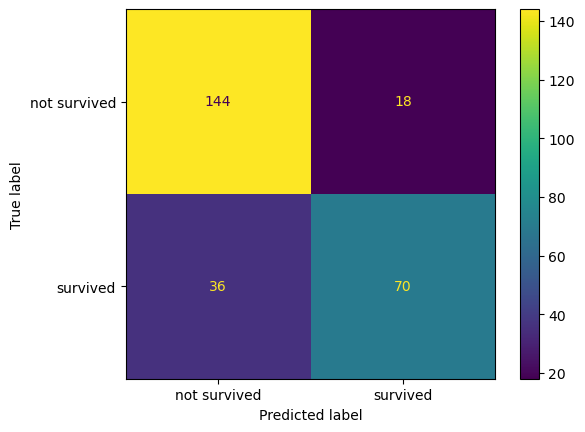

In [25]:
# 1---- survived
#0 ---- not survived


from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['not survived','survived'])

cm_display.plot()
plt.show()

### <font color=purple>Here we have considered Survived as Postive class and Not Survived as Negative class</font>

### <font color=purple> TRUE POSITIVE(TP): The Actual Survived Predicted as Survived =70</font>
### <font color=purple> TRUE NEGATIVE(TN): The Actual Not Survived Predicted as Not Survived =144</font>
### <font color=purple> FALSE POSITIVE(FP): The Actual Not Survived Predicted as Survived =18</font>
### <font color=purple> FALSE NEGATIVE(FN): The Actual Survived Predicted as Not Survived=36</font>

In [26]:
# caluculating accuracy of the model
from sklearn.metrics import accuracy_score

print("\nThe accuracy of the logistic regression model for the dataset is: ")
accuracy_score(Y_test,predicted_values)


The accuracy of the logistic regression model for the dataset is: 


0.7985074626865671

In [27]:
# calculating the accuracy  of the model by formulae

true_positive=70
true_negative=144
false_positive=18
false_negative=36

accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
print(accuracy)

0.7985074626865671


In [28]:
# caluculating the precision of the model
from sklearn.metrics import precision_score

print("\nThe precision of the logistic regression model for the dataset is: ")
precision_score(Y_test,predicted_values)


The precision of the logistic regression model for the dataset is: 


0.7954545454545454

In [102]:
# calculating the preicision of the model by formulae

true_positive=70
true_negative=144
false_positive=18
false_negative=36

precision=(true_positive)/(true_positive+false_positive)
print(precision)

0.7954545454545454


In [103]:
# calculating the recall of the model
from sklearn.metrics import recall_score

print("\nThe recall of the logistic regression model for the dataset is: ")
recall_score(Y_test,predicted_values)


The recall of the logistic regression model for the dataset is: 


0.660377358490566

In [104]:
# calculating the recall of the model by formulae

true_positive=70
true_negative=144
false_positive=18
false_negative=36

recall=(true_positive)/(true_positive+false_negative)
print(recall)

0.660377358490566


In [105]:
# caluculating the f1score of the model
from sklearn.metrics import f1_score

print("\nThe f1 score of the logistic regression model for the dataset is: ")
f1_score(Y_test,predicted_values)


The f1 score of the logistic regression model for the dataset is: 


0.7216494845360825

In [106]:
# calculating the recall of the model by formulae

true_positive=70
true_negative=144
false_positive=18
false_negative=36

f1score=(2*true_positive)/(2*true_positive+false_negative+false_positive)
print(f1score)

0.7216494845360825


# <font color=purple>Performance Measures of Logistic Regression for this dataset:</font>

## <font color=purple> Accuracy = 0.7985</font>
## <font color=purple> Precision = 0.7954</font>
## <font color=purple> Recall = 0.6604</font>
## <font color=purple> F1 Score = 0.7216</font>

# <font color=red>NEUTRAL NETWORKS CLASSIFIER:</font>

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [125]:
#define the network model

model =Sequential()

# it forms two hidden layers with 64 and 32 neurons and input has 7 parameters and output has 1 paramater 
# and for for output network we has used sigmoid activation function so all values between 0 and 1

model.add(Dense(64,input_shape=(7,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# compile the model

# optimizer generally used to update weights based on back propagation alogoritms such as adam here it is used
# loss here is the differnce between the predicted and actual predictions and binary is used only when there are two classes
# YES/NO or 0/1
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#train the model
# no of times the entire training dataset is passed through the neural network model
# batch_size reprents no of samples sent at a time for training
#specifies the level of output for each epoch
# verbose =1 shows level after each epoch
model.fit(X_train,Y_train,epochs=100,batch_size=32,verbose=1)

#evalation of model on test data

test_loss,test_acc=model.evaluate(X_test,Y_test,verbose=0)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.9640 - accuracy: 0.6228
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.6806
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5920 - accuracy: 0.6870
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7143
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.7159
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7352
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7143
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7448
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5570 - accuracy: 0.7544
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.7368
Epoch 11/

In [126]:
print("The Proportion of Correct predictions made on Test Data:\n")
print(test_acc)

The Proportion of Correct predictions made on Test Data:

0.8171641826629639



# <font color=red>PERFORMANCE STUDY OF NEURAL NETWORKS CLASSIFIER:</font> 

In [127]:
# storing the predictions 

Y_predictions=model.predict(X_test)
# this generally Y_predictions represent propabilities and to convert them back into binary predictions
Y_predictions=(Y_predictions>=0.5)

9/9 [==============================] - 0s 1ms/step


In [128]:
# plotting the confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_test,Y_predictions)
print(confusion_matrix)

[[148  14]
 [ 35  71]]


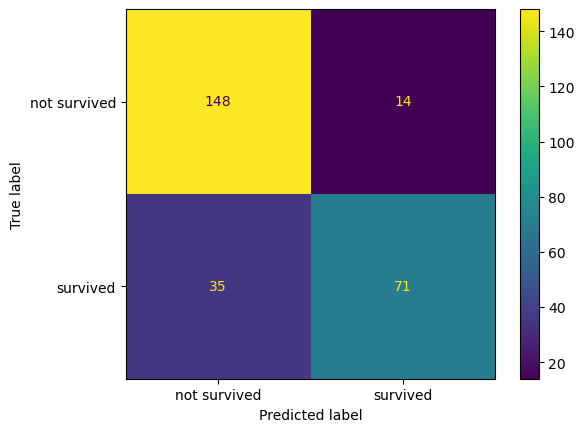

In [129]:
# 1---- survived
#0 ---- not survived


from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['not survived','survived'])

cm_display.plot()
plt.show()

### <font color=purple>Here we have considered Survived as Postive class and Not Survived as Negative class</font>

### <font color=purple> TRUE POSITIVE(TP): The Actual Survived Predicted as Survived =71</font>
### <font color=purple> TRUE NEGATIVE(TN): The Actual Not Survived Predicted as Not Survived =148</font>
### <font color=purple> FALSE POSITIVE(FP): The Actual Not Survived Predicted as Survived =14</font>
### <font color=purple> FALSE NEGATIVE(FN): The Actual Survived Predicted as Not Survived=35</font>

In [138]:
# calculating accuracy of the model
from sklearn.metrics import accuracy_score

print("\nThe Accuracy of the Neural Network model for the dataset is: ")
accuracy_score(Y_test,Y_predictions)


The Accuracy of the Neural Network model for the dataset is: 


0.8171641791044776

In [139]:
# calculating the accuracy  of the model by formulae

true_positive=71
true_negative=148
false_positive=14
false_negative=35

accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
print(accuracy)

0.8171641791044776


In [140]:
# calculating precision of the model
from sklearn.metrics import precision_score

print("\nThe Precision of the Neural Network model for the dataset is: ")
precision_score(Y_test,Y_predictions)


The Precision of the Neural Network model for the dataset is: 


0.8352941176470589

In [141]:
# calculating the precision  of the model by formulae

true_positive=71
true_negative=148
false_positive=14
false_negative=35

precision=(true_positive)/(true_positive+false_positive)
print(precision)

0.8352941176470589


In [142]:
# calculating recall of the model
from sklearn.metrics import recall_score

print("\nThe Recall of the Neural Network model for the dataset is: ")
recall_score(Y_test,Y_predictions)


The Recall of the Neural Network model for the dataset is: 


0.6698113207547169

In [143]:
# calculating the recall of the model by formulae

true_positive=71
true_negative=148
false_positive=14
false_negative=35

recall=(true_positive)/(true_positive+false_negative)
print(recall)

0.6698113207547169


In [144]:
# calculating F1score of the model
from sklearn.metrics import f1_score

print("\nThe F1 Score of the Neural Network model for the dataset is: ")
f1_score(Y_test,Y_predictions)


The F1 Score of the Neural Network model for the dataset is: 


0.743455497382199

In [145]:
# calculating the f1 score of the model by formulae

true_positive=71
true_negative=148
false_positive=14
false_negative=35

f1score=(2*true_positive)/(2*true_positive+false_positive+false_negative)
print(f1score)

0.743455497382199


# <font color=purple>Performance Measures of Neural Networks Classifier for this dataset:</font>

## <font color=purple> Accuracy = 0.8172</font>
## <font color=purple> Precision = 0.8353</font>
## <font color=purple> Recall = 0.6698</font>
## <font color=purple> F1 Score = 0.7435</font>

#  <font color=red> So, Finally Comparing Two Models for the given Titanic Dataset, Neural Networks Classifer Provides Better Performance Compared to Logistic Regression as it has higher Performance Measures.</font>